## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.shape

(178, 13)

In [4]:
for col in X.columns:
    print(f"column name: {col} shape:{X[col].shape}")
    print(f"column name: {col}\n{X[col].value_counts()}\n")

column name: alcohol shape:(178,)
column name: alcohol
12.37    6
13.05    6
12.08    5
12.29    4
12.00    3
        ..
13.34    1
13.69    1
13.90    1
13.84    1
13.75    1
Name: alcohol, Length: 126, dtype: int64

column name: malic_acid shape:(178,)
column name: malic_acid
1.73    7
1.81    4
1.67    4
1.68    3
1.61    3
       ..
3.45    1
2.51    1
4.61    1
3.83    1
2.68    1
Name: malic_acid, Length: 133, dtype: int64

column name: ash shape:(178,)
column name: ash
2.30    7
2.28    7
2.70    6
2.36    6
2.32    6
       ..
2.16    1
2.78    1
2.53    1
1.71    1
1.95    1
Name: ash, Length: 79, dtype: int64

column name: alcalinity_of_ash shape:(178,)
column name: alcalinity_of_ash
20.0    15
21.0    11
16.0    11
18.0    10
19.0     9
        ..
19.4     1
11.2     1
21.6     1
18.1     1
14.8     1
Name: alcalinity_of_ash, Length: 63, dtype: int64

column name: magnesium shape:(178,)
column name: magnesium
88.0     13
86.0     11
98.0      9
101.0     9
96.0      8
102.0 

In [5]:
X.isnull().sum(axis = 0)

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [6]:
X.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
dtype: int64

Все это цифирки, химические характеристики винца, то есть категориальных признаков не обрнаружено.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(228)
X_train_unsc, X_test_unsc, y_train, y_test = train_test_split(X,
                                                              y,
                                                              test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train_unsc),
                       columns=X_train_unsc.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test_unsc),
                      columns=X_test_unsc.columns)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def my_knn(num):
    model = KNeighborsClassifier(n_neighbors=num, metric='euclidean')
    model.fit(temp_train, y_train)
    train_score = round(accuracy_score(y_train, model.predict(temp_train)), 2)
    test_score = round(accuracy_score(y_test, model.predict(temp_test)), 2)
    print(f"{num}\t{train_score}\t{test_score}")
    return model


all_nums = [1, 3, 5, 10, 15, 25]
temp_train = X_train[['alcohol', 'magnesium']]
temp_test = X_test[['alcohol', 'magnesium']]
classifiers = []
print(f"NN\tTrain\tTest")
for i in all_nums:
    classifiers.append(my_knn(i))

NN	Train	Test
1	1.0	0.56
3	0.81	0.61
5	0.79	0.67
10	0.78	0.74
15	0.77	0.69
25	0.71	0.69


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [10]:
%%capture
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [11]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

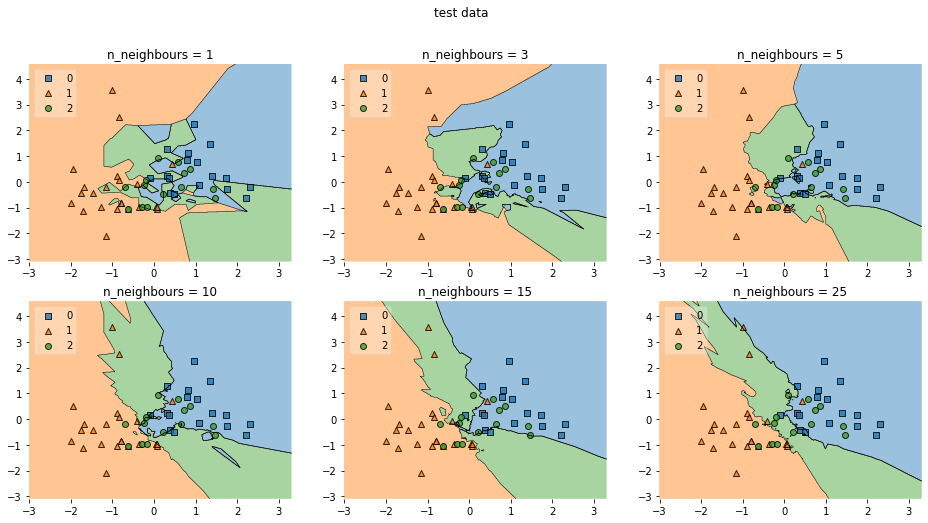

Wall time: 2min 18s


In [12]:
%%time
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

def plot_my_knn(X, y, data_type):
    gs = gridspec.GridSpec(2, 3)
    fig = plt.figure(figsize=(16, 8))
    labels = list(map(str, all_nums))
    res = list(itertools.product([0, 1], [0, 1, 2]))
    fig.suptitle(data_type)

    for clf, lab, grd in zip(classifiers,
                             labels,
                             res):

        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X.to_numpy(),
                                    y=y,
                                    clf=clf,
                                    legend=2)
        plt.title('n_neighbours = ' + lab)

    plt.show()

plot_my_knn(temp_test, y_test, 'test data')

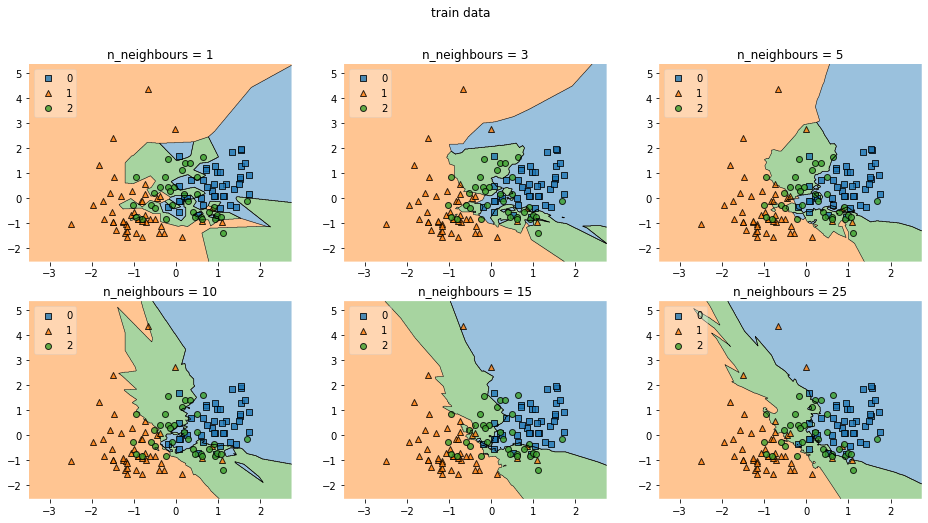

Wall time: 2min 12s


In [13]:
%%time
plot_my_knn(temp_train, y_train, 'train data')

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

для начала определимся с самой концепцией:
+ слишком мало соседей --> переобучение и запоминание train выборки
+ слишком много соседей --> модели уже все равно, она по сути всегда будет выдавать одно и то же (тот класс, который доминирует по своему количеству в обучающей выборке)
+ золотая середина - отлично

окей, теперь можем начать рассуждать и рассматривать геометрию.
при числе соседей 1 или 3 видно, что геометрия области разделения уж очень резкая и чувствительная, выбросы фиксируется как норма, что приводит к "анклавам"

при числе соседей 15 или 25 можно заметить, что область как бы "тупеет" и становится чересчур простой, контуры становятся слишком ровными и она "ленится" тянуться к тем или иным выступам.

победителями становятся 5 и 10 соседей, их область как раз в меру острая и в меру простая. Также можно по-тихому подсмотреть в статистику в результаты работы из прошлого упражнения и заметить, что лучше всех отработали 10 соседей. Разделяющие поверхности делят пространство на области, где лежать обьекты одного типа.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

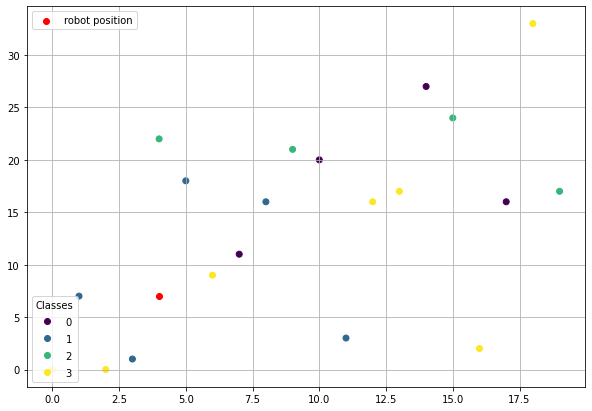

In [14]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        self.knn.fit(landmarks, classes)
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        curr = self.trajectory[-1].reshape(1, -1)
        if np.random.binomial(1, 0.2): # если с вероятностью 0.2 произошел успех
            curr += self.mapping[0]
        else: # иначе посмотрим вокруг
            temp = self.knn.predict(curr)
            curr += self.mapping[temp[0]]
        self.trajectory = np.append(self.trajectory, curr, axis=0)
        
        

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [17]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

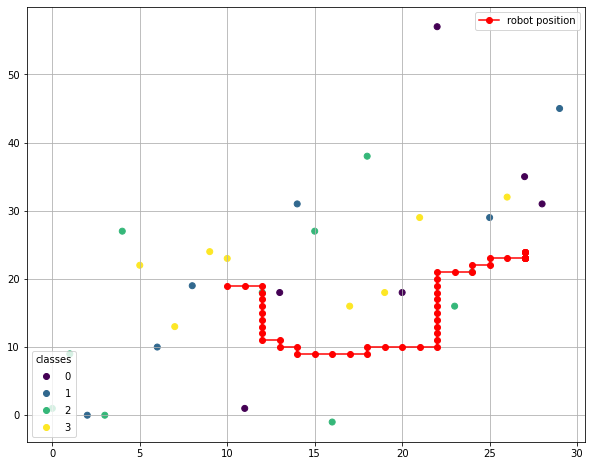

In [18]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

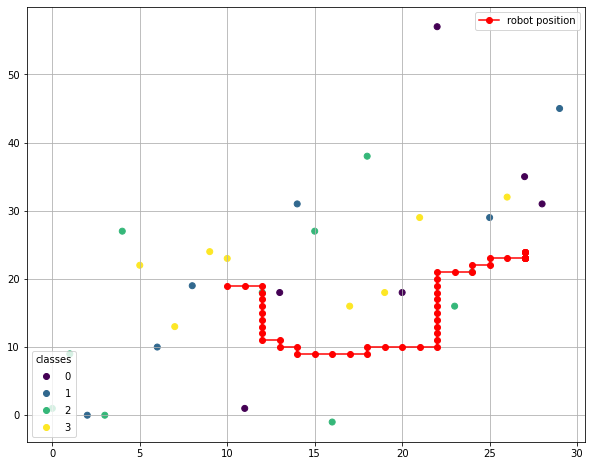

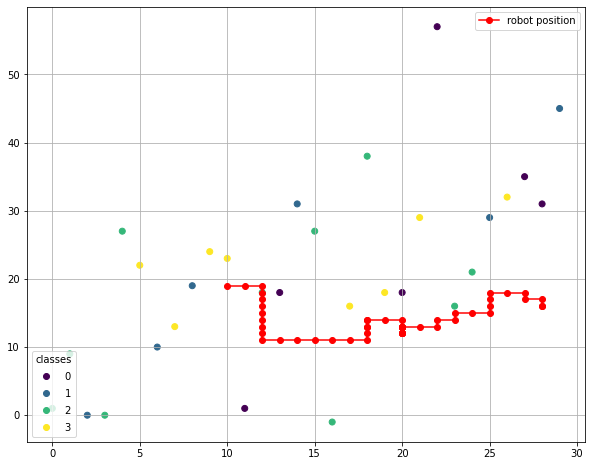

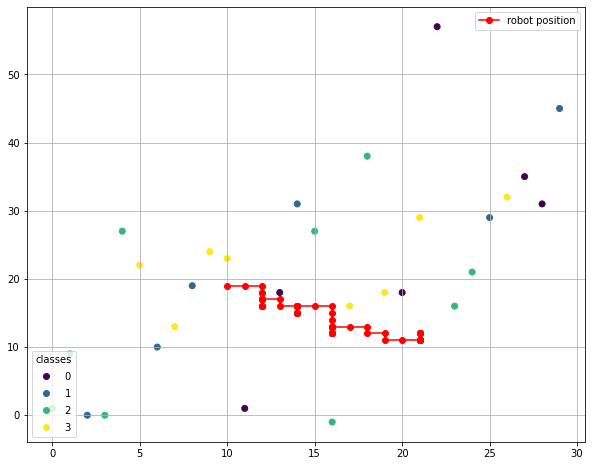

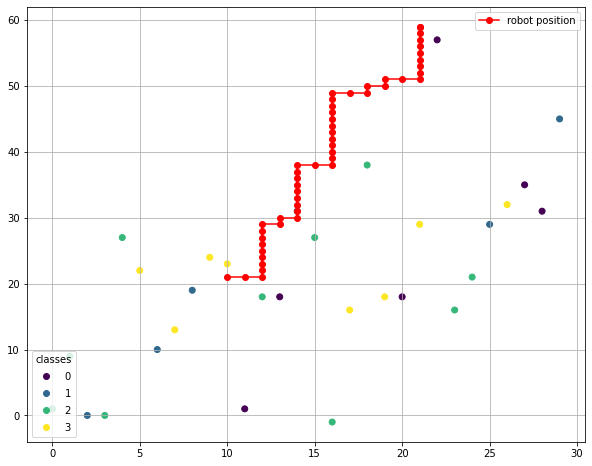

In [19]:
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)

Чем больше число соседей, тем более определенной становится траектория. Например, когда k=5, мы усели шагнуть во все стороны кроме лева. А в случае с k=30, мы шагали только вверх, изредка прерываясь на рандомные шаги вправо. Тогда если при большом k нет смысла осмысленно назначать классы меткам - это ничего не изменит. Однако при небольшом k, осмысленная расстановка классов позволит в той или иной степени управлять роботом. 

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [20]:
data = pd.read_csv('diamonds.csv') # скачал данные в корневую папку
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [21]:
data.shape

(53940, 11)

In [22]:
data.isnull().sum().sum()

0

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [24]:
cat = (data.dtypes == "object").values
for i in data.columns[cat]:
    print(data[i].value_counts(), '\n')

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64 

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64 

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64 



пропусков нет

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [25]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


давайте разбираться, какой признак что значит
+ Unnamed: 0 - ты вообще кто и зачем нужен эээ. удаляем
+ carat - вес бриллианта, важный признак, от которого напрямую должна зависеть стоимость
+ cut - как известно, бриллиант один из самых крепких материалов на Земле,  а значит резать его можно только при помощи другого бриллианта и процесс резки и полировки отнюдь не простой. Да, красивый бриллиант наподобие бриллиантов из мультиков в форме пирамидки, будет цениться больше обычного
+ color - цвет бриллианта, важная характеристика. Какие-то оттенки встречаются в природе реже или просто выглядят красивее, поэтому и стоят дороже
+ clarity - спасибо википедии: "Чистота алмаза - это качество алмаза, которое связано с наличием и визуальным проявлением внутренних характеристик алмаза, называемых включениями, и дефектов поверхности, называемых дефектами." Таким образом качество камня напрямую влияет на цену.
+ depth - thanks to wikipedia: "The depth of a diamond refers to its measurement from top to bottom, from the table on the top of the diamond to the culet at its base. The depth of any diamond is expressed as a percentage. Depth percentage is calculated by dividing the diamond's total height by its total width." Это характеристика пропорциональности камня. значит она влияет на итоговую цену.
+ table - величина преломляющих поверхностей. Как известно, бриллиант может преломлять свет, а значит это напрямую влияет на то, как камень будет восприниматься человеком, что не может не сказаться на цене
+ x, y, z - размерные характеристики камня, которые напрямую влияют на цену. больше - круче!

In [26]:
data = data.drop(['Unnamed: 0'], axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

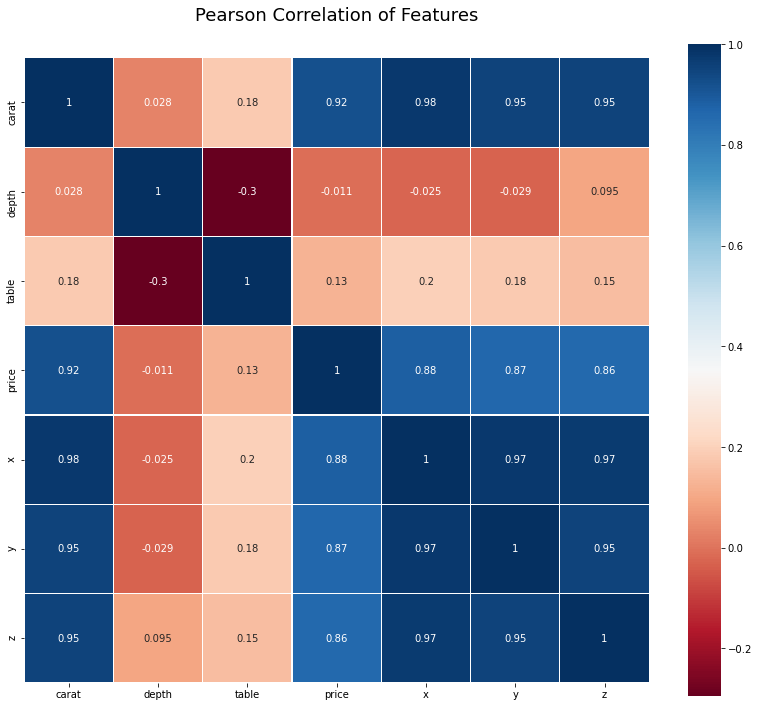

In [27]:
# из 4 семинара по визуализации возьмем код для вывода матрицы коррелции
import seaborn as sns
from matplotlib import pyplot as plt

NumericData = data._get_numeric_data()
NumericData

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Рояль в кустах, с ценной очень очень сильно коррелируют прямым образом координаты размерностей x, y, z, а также количество карат. Больше - круче!!!
по порядку от самого коррелирующего до менее коррелирующего из всех достаточно коррелирующих.
1. carat
2. x
3. y
4. z

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [28]:
print(f"до OHE {data.shape}")
data = pd.get_dummies(data, drop_first=True)
print(f"после OHE {data.shape}")
data

до OHE (53940, 10)
после OHE (53940, 24)


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [29]:
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
y = data['price']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, 
                                                            y,
                                                            test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train_raw),
                       columns=X_train_raw.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test_raw),
                      columns=X_test_raw.columns)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train, y_train)
print (f"Train: {mean_squared_error(y_train, lr.predict(X_train))}")
print (f"Test: {mean_squared_error(y_test, lr.predict(X_test))}")

Train: 1267634.6753225848
Test: 1300722.3768764192


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [32]:
X_train
# заметим, что первые 5 колонок это и есть вещественные переменные

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.632275,1.641229,-0.651911,-0.628148,-0.675511,-0.466213,3.16967,-0.813877,-0.587280,-0.538384,...,-0.429221,-0.333882,-0.232918,-0.185802,1.768462,-0.452491,-0.423147,-0.541984,-0.267022,-0.325190
1,3.383227,0.172243,-1.099008,2.555113,2.526703,2.506457,-0.31549,1.228687,-0.587280,-0.538384,...,2.329804,-0.333882,-0.232918,-0.185802,-0.565463,2.209990,-0.423147,-0.541984,-0.267022,-0.325190
2,-0.885886,-1.226791,-0.651911,-0.904565,-0.871747,-0.987487,-0.31549,1.228687,-0.587280,-0.538384,...,-0.429221,-0.333882,-0.232918,-0.185802,-0.565463,-0.452491,-0.423147,-0.541984,-0.267022,3.075123
3,0.783718,0.032340,-1.546105,0.932274,0.965736,0.928547,-0.31549,1.228687,-0.587280,-0.538384,...,-0.429221,2.995067,-0.232918,-0.185802,-0.565463,2.209990,-0.423147,-0.541984,-0.267022,-0.325190
4,-0.970423,0.382098,-1.546105,-1.136399,-1.103662,-1.057929,-0.31549,1.228687,-0.587280,-0.538384,...,2.329804,-0.333882,-0.232918,-0.185802,-0.565463,-0.452491,-0.423147,-0.541984,3.745006,-0.325190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,-0.505470,0.452050,-0.651911,-0.414147,-0.452515,-0.367593,-0.31549,1.228687,-0.587280,-0.538384,...,2.329804,-0.333882,-0.232918,-0.185802,-0.565463,-0.452491,-0.423147,1.845073,-0.267022,-0.325190
37754,-0.103920,0.452050,-0.204814,0.049521,0.100513,0.125503,-0.31549,-0.813877,-0.587280,1.857410,...,-0.429221,-0.333882,-0.232918,-0.185802,1.768462,-0.452491,-0.423147,-0.541984,-0.267022,-0.325190
37755,-1.054960,0.242195,-1.546105,-1.261233,-1.237459,-1.198814,-0.31549,1.228687,-0.587280,-0.538384,...,-0.429221,2.995067,-0.232918,-0.185802,-0.565463,-0.452491,-0.423147,1.845073,-0.267022,-0.325190
37756,-0.843617,0.032340,0.778800,-0.904565,-0.889586,-0.874779,-0.31549,-0.813877,1.702766,-0.538384,...,2.329804,-0.333882,-0.232918,-0.185802,-0.565463,-0.452491,2.363246,-0.541984,-0.267022,-0.325190


In [33]:
lr.coef_[:6]

array([ 5413.43327186,   -97.30262329,   -64.45974846, -1238.94509669,
          44.5210118 ,   -25.58939914])

очень большие по модулю коэффециенты получились у переменных carat и x, что соответствует матрице корреляций выше.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [34]:
from sklearn.linear_model import Ridge, Lasso

ridge_lr = Ridge(10).fit(X_train, y_train)
print (f"ridge train: {mean_squared_error(y_train, ridge_lr.predict(X_train))}")
print (f"ridge test: {mean_squared_error(y_test, ridge_lr.predict(X_test))}")
print()
lasso_lr = Lasso(10).fit(X_train, y_train)
print (f"lasso train: {mean_squared_error(y_train, lasso_lr.predict(X_train))}")
print (f"lasso test: {mean_squared_error(y_test, lasso_lr.predict(X_test))}")

ridge train: 1267766.4133562979
ridge test: 1300167.5222392236

lasso train: 1328174.2244325045
lasso test: 1365516.8583417598


In [35]:
print(f"Basic: {lr.coef_[:6]}")
print(f"Ridge: {ridge_lr.coef_[:6]}")
print(f"Lasso: {lasso_lr.coef_[:6]}")

Basic: [ 5413.43327186   -97.30262329   -64.45974846 -1238.94509669
    44.5210118    -25.58939914]
Ridge: [ 5373.58231835   -95.36417825   -64.5630167  -1184.48226181
    31.88353826   -29.607972  ]
Lasso: [4923.01745448 -104.98367229  -74.38439838 -748.94363042   -0.
  -23.84331189]


Да, в случае с Lasso регрессией веса уменьшились весьма неплохо, примерно на 400-500. Ridge регрессия тоже срезала веса, но не так сильно, как lasso. Если посмотреть на матрицу коррелляций, заметим, что караты и координаты размерности x, y, z напрямую коррелируют очень сильно. Таким образом, регрессия помогла решить проблему мультиколлинеарности.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

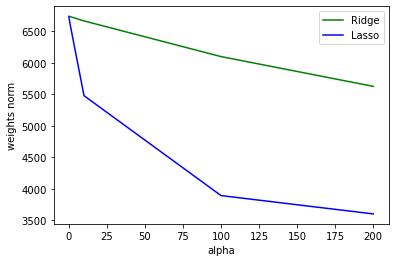

In [36]:
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

ridge, lasso = [], []
alpha = [0.1, 1, 10, 100, 200]
for i in alpha:
    ridge_lr = Ridge(i).fit(X_train, y_train)
    lasso_lr = Lasso(i).fit(X_train, y_train)
    ridge.append(np.linalg.norm(ridge_lr.coef_))
    lasso.append(np.linalg.norm(lasso_lr.coef_))

plt.plot(alpha, ridge, 'g', label='Ridge')
plt.plot(alpha, lasso, 'b', label='Lasso')
plt.xlabel('alpha')
plt.ylabel('weights norm')
plt.legend()
plt.show()

Как видно из графика, lasso агрессивнее уменьшает веса, гораздо агрессивнее чем ridge. Это вполне логично, потому что штрафы в lasso на порядок больше, чем в ridge:
Lasso:
$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$
Ridge:
$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$
И именно поэтому, lasso используется для отбора признаков, ведь она будет очень сильно буянить и штрафовать, если что-то идет не по плану. То есть модель может заштрафовать тот или иной признак в ноль, тем самым исключив его.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [37]:
from sklearn.linear_model import LassoCV

alpha = [0.0000001,
         0.0001,
         0.001,
         0.01,
         0.1,
         0.25,
         0.5,
         0.75,
         1,
         1.25,
         2,
         5,
         10, 
         100, 
         200,
         400]
models = LassoCV(cv=5, alphas=alpha).fit(X_train, y_train)
err = models.mse_path_.mean(axis=1)
params = models.alphas_

D:\anacond\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64195643.2041626, tolerance: 49040524.23839421
  model = cd_fast.enet_coordinate_descent_gram(
D:\anacond\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125964579.97846985, tolerance: 49040524.23839421
  model = cd_fast.enet_coordinate_descent_gram(
D:\anacond\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2247605997.216545, tolerance: 49040524.23839421
  model = cd_fast.enet_coordinate_descent_gram(
D:\anacond\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might 

In [38]:
mn = float("inf")
best = None
for er, par in zip(err, params):
    if er < mn:
        mn = er
        best = par
    print(par, '\t', er)
print(f"\nнаименьшая ошибка {mn} достигается при параметре {best}")

400.0 	 2570202.4459674233
200.0 	 2148667.4131701957
100.0 	 1772158.0056154903
10.0 	 1331384.833296009
5.0 	 1286056.8207129333
2.0 	 1273340.2970200705
1.25 	 1271862.9794750263
1.0 	 1271522.7461256634
0.75 	 1271288.1000068225
0.5 	 1271144.3735254302
0.25 	 1271450.1820578363
0.1 	 1271917.5341589143
0.01 	 1272305.2434145736
0.001 	 1272358.7701630879
0.0001 	 1272364.4756724746
1e-07 	 1272365.1011733394

наименьшая ошибка 1271144.3735254302 достигается при параметре 0.5


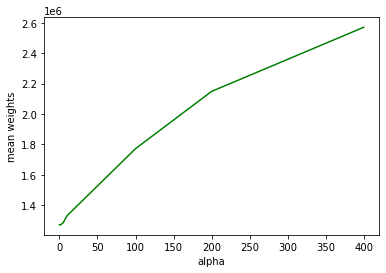

In [39]:
plt.plot(params, err, 'g')
plt.xlabel('alpha')
plt.ylabel('mean weights')
plt.show()

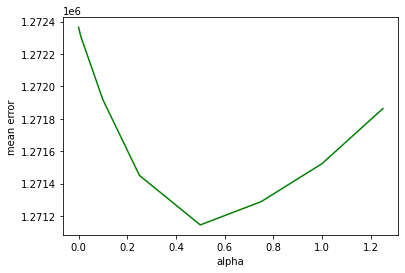

In [40]:
plt.plot(params[-10:], err[-10:], 'g')
plt.xlabel('alpha')
plt.ylabel('mean error')
plt.show()

посмотроив график всех значений, можно заметить, что внимание нужно обратить на коэффициенты меньше 10. Теперь рассмотрим поближе величины ошибок, которые дают небольшие коэффециенты. Минимальная ошибка достигается при $\alpha$ = 0.5. Если ошибка минимальна, значит качество максимально!

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [41]:
lasso_best = Lasso(best).fit(X_train, y_train)
print (f"lasso train: {mean_squared_error(y_train, lasso_best.predict(X_train))}")
print(f"Lasso: {lasso_best.coef_}")

lasso train: 1267822.9713791911
Lasso: [ 5390.53849376   -98.24030539   -65.11190283 -1176.03943417
     0.           -23.36743824   157.84517205   394.26701327
   318.18301953   290.60158602   -73.56298401  -103.28820354
  -196.11135719  -350.32230401  -441.47738604  -526.52964974
   933.06681519  1498.08462126   944.7409292   1583.91136535
  1717.44374365  1209.8616588   1411.88156654]


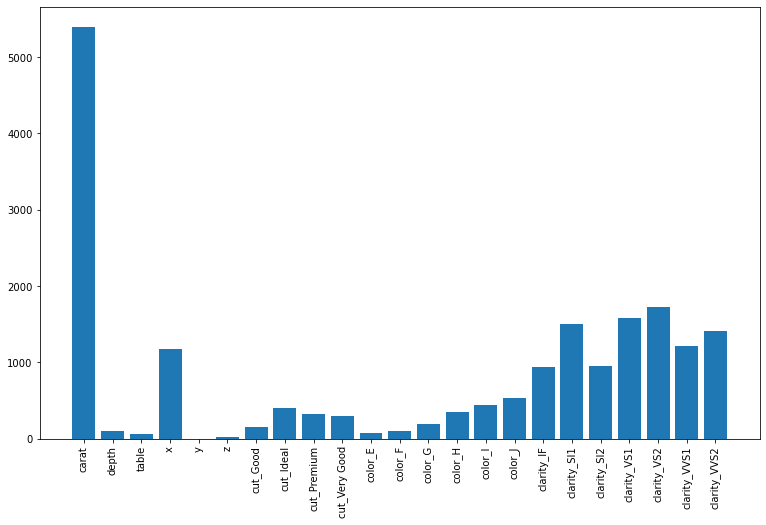

In [42]:
import matplotlib.pyplot as plt

# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
nums = np.abs(lasso_best.coef_)
plt.xticks(rotation=90)
ax.bar(X_train.columns, nums)
plt.show()

начем с наиболее неинформативных признаков:
+ значение кефа при y, равно 0, регрессия избавилась от него
+ значение кефа при z, не равно 0, но все равно одно из самых малых, поэтому тоже можно сказать, что он не очень важен.
вероятнее всего, для наибольшей стоимости камня, должны соблюдаться определенные пропорции камня, то есть не просто все координаты должны быть большими, а они должны расти по определенной зависимости. в то же время кеф при x достаточно большой, регрессия отобрала этот признак. Вероятнее всего, x координата является ключевой и в какой-то мере абсолютной.

теперь рассмотрим наиболее информативные признаки:
+ carat тут абсолютный победитель, оно и вполне логично, вес бриллианта напрямую влияет на цену и как оказалось очень сильно
+ x координата, как было описано ранее тоже имеет достаточно большой кеф
+ группа признаков, связанных с clarity. блеск, достигаемый преломлением света в камне формирует его облик. Также как и с carat, изначальное предположение оказалось верным

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lasso_best = Lasso(best).fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)
print (f"Test default:\t{mean_squared_error(y_test, lr.predict(X_test))}")
print (f"Test lasso:\t{mean_squared_error(y_test, lasso_best.predict(X_test))}")

Test default:	1300722.3768764192
Test lasso:	1300718.6956349462


https://www.youtube.com/watch?v=VFGWYgPMH7c

ну... не сильно меньше стала ошибка при использовании регрессии

In [44]:
print(f"Lasso: {lasso_best.coef_}\n")
print(f"Default: {lr.coef_}")

Lasso: [ 5390.53849376   -98.24030539   -65.11190283 -1176.03943417
     0.           -23.36743824   157.84517205   394.26701327
   318.18301953   290.60158602   -73.56298401  -103.28820354
  -196.11135719  -350.32230401  -441.47738604  -526.52964974
   933.06681519  1498.08462126   944.7409292   1583.91136535
  1717.44374365  1209.8616588   1411.88156654]

Default: [ 5413.43327186   -97.30262329   -64.45974846 -1238.94509669
    44.5210118    -25.58939914   163.03789738   403.07634453
   326.92447962   297.56586352   -77.25476463  -106.7287099
  -200.02478793  -353.97821632  -445.08720698  -529.50522818
   948.98931419  1535.250194     977.02243081  1615.32134305
  1753.78389941  1231.71709573  1437.54540377]


Регрессия убила один из признаков, а также причесала другие. Возможно, мультиколлинеарности не было и регуляризатор просто штрафовал модель за каждый шорох. также на отсутствие мультиколлинеарности указывает, что при самом лучшем коэфициенте регуляризации результат едва едва сходится с исходным, при остальных кефах ошибка больше.